- WOE (Weight of Evidence) ช่วยทำ Data Cleaning , Label และ Feature Engineering, Mssing Value
    - Feature Engineering : สร้าง/ตัด Feature ใหม่ ที่มีความเกี่ยวข้องจริงๆ เช่น Max Min Mean ont hot encoding, การทำ Binning
        - Binning หรือ แบ่งบิล จัดกลุ่ม ช่วย จัดการ Outlier
            - Outlier : ข้อมูลที่สูง หรือต่ำ โดดๆ จากลุ่มมาก
         
- ค่า IV (Infornation Value) มาก บอกถึงความสามารถที่อธิบายได้ดี (Good / Bad) : Feature Selection
    - Feature Selection ตัด หรือ เลือกตัวแปรที่อธิบาย และจำเป็นที่ดีจริง
    https://miro.medium.com/max/1156/1*5S_5aAHWe0_knDGZUK3W8w.png
    
(ใช้กับ Logistic Regression เท่านั้น)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [2]:
# https://github.com/pornpra/Credit-Scoring-Online-Course.git
df = pd.read_csv('Credit-Scoring-Online-Course/credit_scoring_dataset.csv', index_col='customer_id')

print(df.shape)
df.head()

(32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218195,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413027,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


Good    25472
Bad      7109
Name: loan_status, dtype: int64
****************************************
Good    78.180535
Bad     21.819465
Name: loan_status, dtype: float64
****************************************


C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


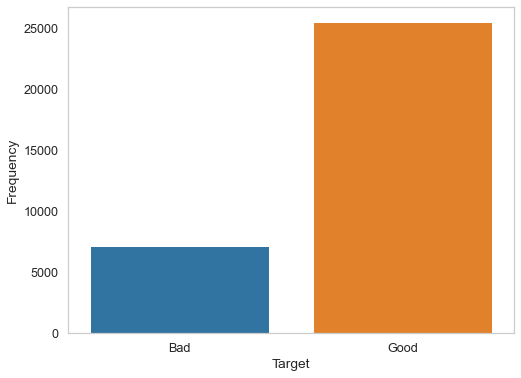

Imbalance Ratio (IR) = 1:3


In [5]:
## Univariate analysis (loan_status:สถานะเงินกู้)

df_target = df[['loan_status']]
df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')

print(df_target['loan_status'].value_counts())
print('*'*40)
print(df_target['loan_status'].value_counts()/len(df_target)*100)
print('*'*40)

fig = plt.figure(figsize=(8,6))
sns.countplot(x='loan_status',data=df_target, palette='tab10')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

## IR = (negative_class/positive_class)
## Where positive_class is the number of minority class samples and negative_class is the number of majority class samples

count_good = len(df_target.loc[df_target['loan_status']=='Good'])
count_bad = len(df_target.loc[df_target['loan_status']=='Bad'])

print("Imbalance Ratio (IR) = 1:{}".format(int(count_good/count_bad)))

In [6]:
## Bivariate analysis (หลายตัวแปรมาดูร่วมกัน)

# loan_status : สถานะเงินกู้ = Good = 0
df_age = df[['loan_status', 'person_age']]

# จัดบิลตามอายุ rang ให้อยู่เป็นกลุ่ม
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)

df_age

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,loan_status,person_age,bin_person_age
customer_id,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,1,22,"(19.0, 23.0]"
49d00b80-f7ec-41ec-8063-8cc32f384268,0,21,"(19.0, 23.0]"
25172c7f-160a-44ac-b271-5833b7a679f6,1,25,"(23.0, 25.0]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,1,23,"(19.0, 23.0]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,1,24,"(23.0, 25.0]"
...,...,...,...
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,0,57,"(32.0, 144.0]"
ece9693f-16c5-416b-bfa7-34eae7bdc4b3,0,54,"(32.0, 144.0]"
1fcb6014-9aad-45be-ac2a-490cfc55c0e4,1,65,"(32.0, 144.0]"


In [7]:
df_age[:20]

,loan_status,person_age,bin_person_age
customer_id,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,1,22,"(19.0, 23.0]"
49d00b80-f7ec-41ec-8063-8cc32f384268,0,21,"(19.0, 23.0]"
25172c7f-160a-44ac-b271-5833b7a679f6,1,25,"(23.0, 25.0]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,1,23,"(19.0, 23.0]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,1,24,"(23.0, 25.0]"
01e15c6d-1e6e-4974-8a68-6d4e49fdcdde,1,21,"(19.0, 23.0]"
5801ae3a-730c-49b7-9268-a07de903f0ad,1,26,"(25.0, 27.0]"
6e527075-420b-4b7d-a31d-38c432629607,1,24,"(23.0, 25.0]"
45187d21-3cbc-4f2c-889f-8531adba5c52,1,24,"(23.0, 25.0]"


In [8]:
df_age = df[['loan_status', 'person_age']]
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0) # อายุคนจำนวน 5 ช่วง

#รวมตาราง bin_person_age กับ loan_status (count, sum)
df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']}) 
df_age.columns = df_age.columns.map('_'.join) # มัดคอลัมรวมกันในบรรทัดเดียว

df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum() # Sum all = 1 # distribution mean
df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count'] # bad_rate อัตราการผิดนัดชำระหนี้
df_age = df_age.reset_index()
df_age

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


In [9]:
df_age['loan_status_count'].sum()

32581

In [10]:
df_age['loan_status_count']

0    8766
1    6586
2    4615
3    6963
4    5651
Name: loan_status_count, dtype: int64

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


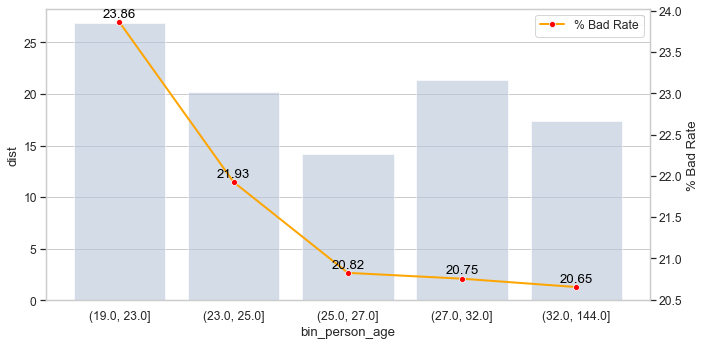

In [11]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(10,5))


# =============================================== #

### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(df_age['bin_person_age'], df_age['dist']*100, data = df_age, color='lightsteelblue', alpha=.6,
            ax = ax)

### y axis (right) is line chart ###
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_age, x=df_age.index, y=df_age['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='red', markersize=6, color='orange', 
                  linewidth=2, label='% Bad Rate')

for x,y in zip(df_age.index, df_age['bad_rate']*100):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

ax.legend()
ax2.grid(False)
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

## DSR

In [12]:
# debt service ratio or DSR (หนี้ต่อรายได้ น้อย = ดี)
df['dsr'] = df['loan_amnt']/df['person_income']

In [13]:
df['dsr']

customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1    0.593220
49d00b80-f7ec-41ec-8063-8cc32f384268    0.104167
25172c7f-160a-44ac-b271-5833b7a679f6    0.572917
a8f721ac-9696-48b3-ae35-bc8b13592d26    0.534351
53be6c0c-0a33-41c1-a8d0-e9784b077f98    0.643382
                                          ...   
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c    0.109434
ece9693f-16c5-416b-bfa7-34eae7bdc4b3    0.146875
1fcb6014-9aad-45be-ac2a-490cfc55c0e4    0.460526
a3e63186-afb3-48cd-a0ca-dcb22825107d    0.100000
5185b116-af1e-4951-b9f0-d9d1f0d79b3e    0.154167
Name: dsr, Length: 32581, dtype: float64

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


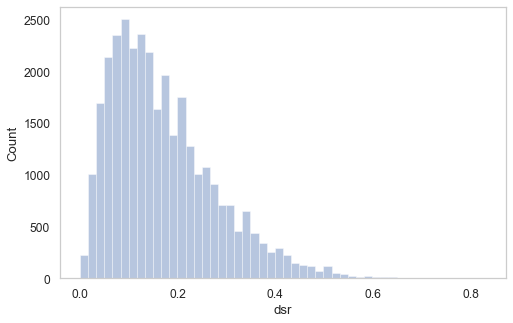

In [14]:
plt.subplots(figsize=(8,5))
sns.distplot(df['dsr'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

In [15]:
df.loc[df['dsr']>0.8]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
0ab3438d-8c0f-4fb2-a394-388e88a2835a,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,1,N,3,0.83


In [16]:
# จัดกลุ่ม dsr กับ loan_status
# ทำ Binning

df_dsr = df[['loan_status', 'dsr']]
df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0) # dsr จำนวน 5 ช่วง (Binning)
df_dsr = df_dsr.groupby('bin_dsr').agg({'loan_status': ['count', 'sum']}) # sum = bad = 1
df_dsr.columns = df_dsr.columns.map('_'.join)
df_dsr['dist'] = df_dsr['loan_status_count']/df_dsr['loan_status_count'].sum() # Sum all = 1 # distribution mean
df_dsr['bad_rate'] = df_dsr['loan_status_sum']/df_dsr['loan_status_count'] # bad_rate อัตราการผิดนัดชำระหนี้
df_dsr = df_dsr.reset_index()
df_dsr

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,bin_dsr,loan_status_count,loan_status_sum,dist,bad_rate
0,"(-0.09920000000000001, 0.08]",6524,694,0.200239,0.106376
1,"(0.08, 0.1]",6510,818,0.199810,0.125653
2,"(0.1, 0.2]",6515,956,0.199963,0.146738
3,"(0.2, 0.3]",6517,1233,0.200025,0.189197
4,"(0.3, 0.8]",6515,3408,0.199963,0.523101


C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


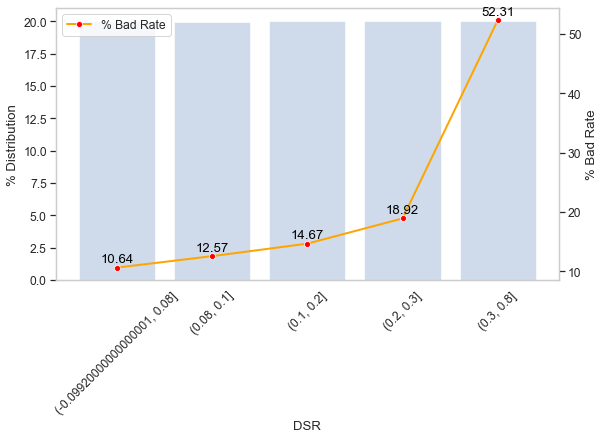

In [17]:
x1 = df_dsr['bin_dsr'].astype(str)
x2 = df_dsr.index
y1 = df_dsr['dist']*100
y2 = df_dsr['bad_rate']*100

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax1  = plt.subplots(figsize=(9,5))
plt.tick_params(axis='x', rotation = 45)

ax1.bar(x1,y1, data = df_dsr, color='lightsteelblue', alpha=.6)
ax1.xaxis.grid()
ax2 = ax1.twinx()
ax2 = sns.lineplot(x2, y2, data = df_dsr, marker='o',\
                markerfacecolor='red', markersize=6, color='orange', 
                linewidth=2, label='% Bad Rate')
ax1.set_xlabel('DSR')
ax1.set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
ax1.grid(False)
ax2.grid(False)

for x,y in zip(x2,y2):
        label = "{:.2f}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


plt.show()

## Weight of Evidence (WOE) & Information Value (IV)

- WOE (Weight of Evidence) ช่วยทำ Data Cleaning , Label และ Feature Engineering, Mssing Value
    - Feature Engineering : สร้าง/ตัด Feature ใหม่ ที่มีความเกี่ยวข้องจริงๆ เช่น Max Min Mean ont hot encoding, การทำ Binning
        - Binning หรือ แบ่งบิล จัดกลุ่ม ช่วย จัดการ Outlier
            - Outlier : ข้อมูลที่สูง หรือต่ำ โดดๆ จากลุ่มมาก
         
- ค่า IV (Infornation Value) มาก บอกถึงความสามารถที่อธิบายได้ดี (Good / Bad) : Feature Selection
    - Feature Selection ตัด หรือ เลือกตัวแปรที่อธิบาย และจำเป็นที่ดีจริง
    https://miro.medium.com/max/1156/1*5S_5aAHWe0_knDGZUK3W8w.png
    
(ใช้กับ Logistic Regression เท่านั้น)

In [ ]:
## clean DATA

In [18]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3,0.593220
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,0.104167
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,0.572917
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,0.534351
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,0.643382
...,...,...,...,...,...,...,...,...,...,...,...,...
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30,0.109434
ece9693f-16c5-416b-bfa7-34eae7bdc4b3,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19,0.146875
1fcb6014-9aad-45be-ac2a-490cfc55c0e4,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28,0.460526


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  dsr                         32581 non-null  float64
dtypes: float64(3), int64(5), ob

In [20]:
def fill_missing(df):
    for col in df.columns:
        
        # Check object
        if  df[col].dtypes == np.object :
            print('object: ', df[col])
            df[col] = df[col].fillna(value='Unidentified')
            
        
        # Check number
        elif df[col].dtypes == np.number:
            print('number: ', df[col])
            df[col] = df[col].fillna(df[col].median()) 
            
            

    return df

In [21]:
df_clean = fill_missing(df)
df_clean.info()

object:  customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1        RENT
49d00b80-f7ec-41ec-8063-8cc32f384268         OWN
25172c7f-160a-44ac-b271-5833b7a679f6    MORTGAGE
a8f721ac-9696-48b3-ae35-bc8b13592d26        RENT
53be6c0c-0a33-41c1-a8d0-e9784b077f98        RENT
                                          ...   
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c    MORTGAGE
ece9693f-16c5-416b-bfa7-34eae7bdc4b3    MORTGAGE
1fcb6014-9aad-45be-ac2a-490cfc55c0e4        RENT
a3e63186-afb3-48cd-a0ca-dcb22825107d    MORTGAGE
5185b116-af1e-4951-b9f0-d9d1f0d79b3e        RENT
Name: person_home_ownership, Length: 32581, dtype: object
number:  customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1    123.0
49d00b80-f7ec-41ec-8063-8cc32f384268      5.0
25172c7f-160a-44ac-b271-5833b7a679f6      1.0
a8f721ac-9696-48b3-ae35-bc8b13592d26      4.0
53be6c0c-0a33-41c1-a8d0-e9784b077f98      8.0
                                        ...  
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c      1.0
ece9693f-16c5-416b-bfa7-34eae7bdc4b3   

C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
C:\Users\Diode\Anaconda3\envs\TF2_PY37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3,0.593220
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,0.104167
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,0.572917
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,0.534351
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,0.643382
...,...,...,...,...,...,...,...,...,...,...,...,...
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30,0.109434
ece9693f-16c5-416b-bfa7-34eae7bdc4b3,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19,0.146875
1fcb6014-9aad-45be-ac2a-490cfc55c0e4,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28,0.460526


In [23]:
# จัดกลุ่มบิล

def binning_numeric(df):
    
    # ที่เป็นตัวเลข
    for i in df._get_numeric_data().columns:
        
        # ยกเว้น loan_status
        if i == 'loan_status':
            continue
        else:
            print('df[i]: ', df[i])
            df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')
            print(df[i])
            print('-------------------')
    return df_clean


In [24]:
df_bin = binning_numeric(df_clean)
df_bin.info()

df[i]:  customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1    22
49d00b80-f7ec-41ec-8063-8cc32f384268    21
25172c7f-160a-44ac-b271-5833b7a679f6    25
a8f721ac-9696-48b3-ae35-bc8b13592d26    23
53be6c0c-0a33-41c1-a8d0-e9784b077f98    24
                                        ..
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c    57
ece9693f-16c5-416b-bfa7-34eae7bdc4b3    54
1fcb6014-9aad-45be-ac2a-490cfc55c0e4    65
a3e63186-afb3-48cd-a0ca-dcb22825107d    56
5185b116-af1e-4951-b9f0-d9d1f0d79b3e    66
Name: person_age, Length: 32581, dtype: int64
customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1     (19.0, 23.0]
49d00b80-f7ec-41ec-8063-8cc32f384268     (19.0, 23.0]
25172c7f-160a-44ac-b271-5833b7a679f6     (23.0, 25.0]
a8f721ac-9696-48b3-ae35-bc8b13592d26     (19.0, 23.0]
53be6c0c-0a33-41c1-a8d0-e9784b077f98     (23.0, 25.0]
                                            ...      
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c    (32.0, 144.0]
ece9693f-16c5-416b-bfa7-34eae7bdc4b3    (32.0, 144.0]
1fcb6014-9aad-45b

customer_id
616d39c7-4cca-4e2e-a65c-848a9543cfe1     (0.3, 0.8]
49d00b80-f7ec-41ec-8063-8cc32f384268    (0.08, 0.1]
25172c7f-160a-44ac-b271-5833b7a679f6     (0.3, 0.8]
a8f721ac-9696-48b3-ae35-bc8b13592d26     (0.3, 0.8]
53be6c0c-0a33-41c1-a8d0-e9784b077f98     (0.3, 0.8]
                                           ...     
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c    (0.08, 0.1]
ece9693f-16c5-416b-bfa7-34eae7bdc4b3     (0.1, 0.2]
1fcb6014-9aad-45be-ac2a-490cfc55c0e4     (0.3, 0.8]
a3e63186-afb3-48cd-a0ca-dcb22825107d    (0.08, 0.1]
5185b116-af1e-4951-b9f0-d9d1f0d79b3e     (0.1, 0.2]
Name: dsr, Length: 32581, dtype: object
-------------------
<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   person_age                  32581 non-null  object
 1   person_income

In [25]:
df_woe = df_bin.copy()
df_woe.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(1.0, 3.0]","(0.3, 0.8]"
49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,"(1.0, 3.0]","(0.08, 0.1]"
25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(3.0, 4.0]","(0.3, 0.8]"


In [28]:
# ดู  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['loan_grade']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['loan_grade'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

,total,count_bad,count_good
loan_grade,,,
A,10777,1073,9704
B,10451,1702,8749
C,6458,1339,5119
D,3626,2141,1485
E,964,621,343
F,241,170,71
G,64,63,1


In [ ]:
# ดู  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['person_home_ownership']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_home_ownership'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

In [26]:
# ดู  count_bad  count_good
d = pd.DataFrame(df_woe.groupby(['person_age']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_age'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d

,total,count_bad,count_good
person_age,,,
"(19.0, 23.0]",8766,2092,6674
"(23.0, 25.0]",6586,1444,5142
"(25.0, 27.0]",4615,961,3654
"(27.0, 32.0]",6963,1445,5518
"(32.0, 144.0]",5651,1167,4484


In [ ]:
# woe and iv

In [ ]:
d = pd.DataFrame(df_woe.groupby(['person_age']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_age'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d['dist_bad'] = d['count_bad']/d['count_bad'].sum() #dist_bad
d['dist_good'] = d['count_good']/d['count_good'].sum() #dist_good

# ============= woe =========== #
# WOE = ln [ (%Distribution ที่สนใจ : Bad) / (%Distribution ที่ไม่สนใจ : Good) ]
d['woe'] = np.log(d.dist_bad/d.dist_good) # woe
# ============= woe =========== #

# ============= iv =========== #
# iv = SUM [ [(%Distribution ที่สนใจ : Bad) - (%Distribution ที่ไม่สนใจ : Good)] x WOE ]

d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good) # iv
# ============= iv =========== #

d = d.replace([np.inf, -np.inf], 0) # ดัก Error ค่าคำนวณไม่ได้
d = d.reset_index()

d

In [ ]:
# ค่า iv สุดท้าย ต้อง รวมกันทั้งหมด

d['iv'].sum() # person_age

In [ ]:
# person_age = woe แต่ละบิล
woe_dict = d.groupby(['person_age'])['woe'].mean().to_dict()
woe_dict

In [ ]:
# สร้างตาราง

df_demo_woe = df_woe[['person_age']]
df_demo_woe['woe_person_age'] = df_demo_woe['person_age'].map(woe_dict)
df_demo_woe.sample(10) # สุ่มมา 10 ตัว

In [ ]:
# ทำเป็น funtion เพื่อหาค่าทุกคอลัม

def woe_iv(df_woe):
    iv_dict = {}
    final_iv = {}

    for i in df_woe.select_dtypes(object).columns:

        ### Calculate WOE and IV ###
        d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

        d['count_bad'] = df_woe.groupby([i])['loan_status'].sum()
        d['count_good'] = d['total']-d['count_bad']

        d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
        d['dist_good'] = d['count_good']/d['count_good'].sum()

        d['woe'] = np.log(d.dist_bad/d.dist_good) # woe
        d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good) # iv

        d = d.replace([np.inf, -np.inf], 0)
        d = d.reset_index()

        # --------------------- #

        ### Append dataframe in dictionary ###
        if i not in final_iv:
            final_iv[i] = []
        final_iv[i].append(d)

        ### Map WOE value ###
        woe_dict = d.groupby([i])['woe'].mean().to_dict()
        df_woe['woe_'+i] = df_woe[i].map(woe_dict)

        ### Calculate final IV of each feature and append in dictionary
        if i not in iv_dict:
            iv_dict[i] = []
        iv_dict[i].append(d['iv'].sum())

    ### Generate IV dataframe
    iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
    iv_df.index.name = 'Feature'

    return final_iv, iv_df, df_woe

In [ ]:
final_iv, IV, df_woe = woe_iv(df_woe)

In [ ]:
df_woe

In [ ]:
IV

In [ ]:
# ค่า IV มาก บอกถึงความสามารถที่อธิบายได้ดี (Good / Bad)
# Feature Selection

IV.sort_values(by='IV', ascending=False)

In [ ]:


def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

In [ ]:
final_iv['person_age']

In [ ]:
df_woe.info()

In [ ]:
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

In [ ]:
## เอาค่า WOE ที่แปลงจากตัวแปรที่ได้ (data มีความหมายที่สัมพันธ์ กับ loan_status แล้ว) ไปเข้าโมเดล Logistic Regression 